# Stats 147 Final Project - Bennett Cohen - 405303580 

# <u> Datashader for Big-Data Visualization <u/>

### Data Read-In and Prep

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [ ]:
data = pd.read_csv("events.csv")
pd.set_option('display.max_columns', None)

In [ ]:
data.head()

In [ ]:
data = data.loc[:, ['shot_place', 'shot_outcome', 'is_goal']].dropna()

In [ ]:
index = np.array(data.index)

In [ ]:
data

In [ ]:
shot_x = []
shot_y = []
for i in index:
    n = data.loc[i, 'shot_place']
    if n == 1:
        shot_x.append(random.randint(-2, 24) + np.random.normal(0, .5))
        shot_y.append(11 + np.random.normal(0, .5))
    if n == 2:
        shot_x.append(12.5 + np.random.normal(0, .5))
        shot_y.append(5 + np.random.normal(0, .5))
    if n == 3:
        shot_x.append(0 + np.random.normal(0, .5))
        shot_y.append(3 + np.random.normal(0, .5))
    if n == 4:
        shot_x.append(25 + np.random.normal(0, .5))
        shot_y.append(3 + np.random.normal(0, .5))
    if n == 5:
        shot_x.append(12.5 + np.random.normal(0, .5))
        shot_y.append(5 + np.random.normal(0, .5))
    if n == 6:
        shot_x.append(-4.5 + 34 * random.randint(0, 1) + np.random.normal(0, .5))
        shot_y.append(12 + np.random.normal(0, .5))
    if n == 7:
        shot_x.append(random.randint(-2, 25) + np.random.normal(0, .5))
        shot_y.append(11 + np.random.normal(0, .5))
    if n == 8:
        shot_x.append(-4.5 + np.random.normal(0, .5))
        shot_y.append(random.randint(-2, 13) + np.random.normal(0, .5))
    if n == 9:
        shot_x.append(27.5 + np.random.normal(0, .5))
        shot_y.append(random.randint(-2, 13) + np.random.normal(0, .5))
    if n == 10:
        shot_x.append(random.randint(-4, 26) + np.random.normal(0, .5))
        shot_y.append(13 + np.random.normal(0, .5))
    if n == 11:
        shot_x.append(12.5 + np.random.normal(0, .5))
        shot_y.append(8.5 + np.random.normal(0, .5))
    if n == 12:
        shot_x.append(-2.5 + np.random.normal(0, .5))
        shot_y.append(8.5 + np.random.normal(0, .5))
    if n == 13:
        shot_x.append(25 + np.random.normal(0, .5))
        shot_y.append(8.5 + np.random.normal(0, .5))

In [ ]:
data['shot_x'] = shot_x
data['shot_y'] = shot_y

In [ ]:
data

## **Motivation**

In [ ]:
img = plt.imread("soccer-goal-isolated.jpg")
fig, ax = plt.subplots()
ax.imshow(img)

In [ ]:
img = plt.imread("soccer-goal-isolated.jpg")
fig, ax = plt.subplots()
ax.imshow(img, extent = [min(data.shot_x), max(data.shot_x), min(data.shot_y), max(data.shot_y)])
ax.scatter(data.shot_x, data.shot_y)
plt.show()

# **Datashader Alternative**

In [ ]:
import datashader as ds
import holoviews as hv
from holoviews import opts
from holoviews.operation.datashader import datashade
hv.extension('bokeh')

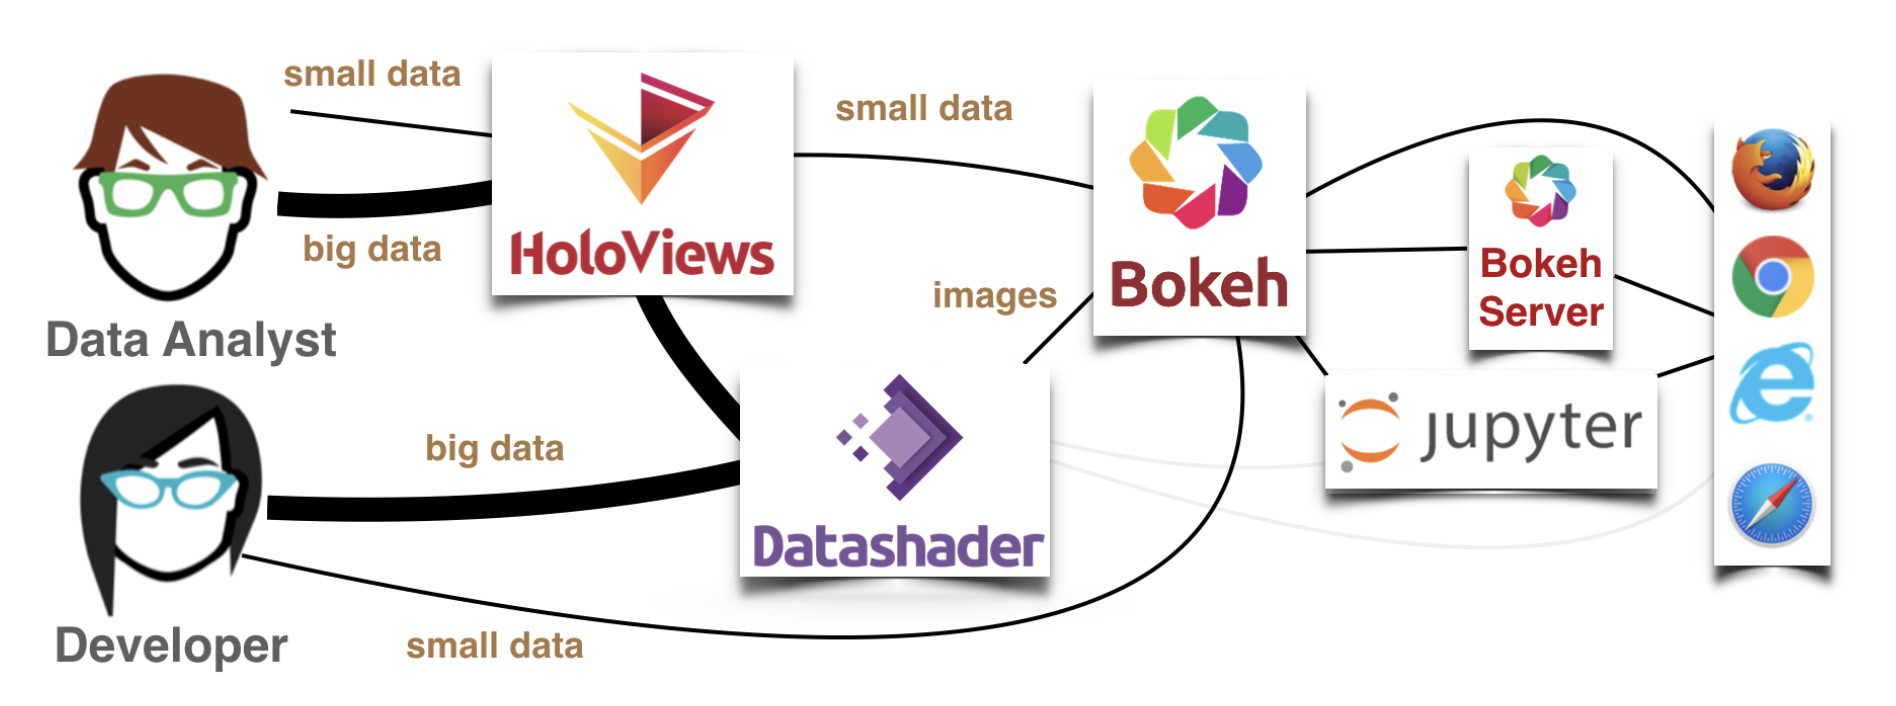

### This image was found under the Interactivity page on the Datashader.org website.

In [ ]:
x0 = min(data.shot_x) - 1
x1 = max(data.shot_x) + 1
y0 = min(data.shot_y) - 1
y1 = max(data.shot_y) + 1

In [ ]:
hv.Points(data, ["shot_x", "shot_y"])

In [ ]:
datashade(hv.Points(data, ["shot_x", "shot_y"]))

In [ ]:
hv.RGB.load_image('new_pic.png', bounds = (x0, y0, x1, y1))

In [ ]:
points = datashade(hv.Points(data, ["shot_x", "shot_y"]))
goal = hv.RGB.load_image('new_pic.png', bounds = (x0, y0, x1, y1))

In [ ]:
layout = points + goal

In [ ]:
layout

In [ ]:
## order matters, otherwise the points would be behind the image
overlay = goal * points

In [ ]:
overlay.opts(height=500,width=800)

# Additional Resources

* Datashader documentation
* Holoviews documentation
* If using Datashader for geographic plotting, explore Geoviews
    * A package in the same family of packages for this very use